In [1]:
import numpy as np  # this module handles arrays, but here we need it for its NaN value
import pandas as pd # this module contains a lot of tools for handling tabular data
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# define paths to the source files and eventual output file
pathBottle='/ocean/eolson/MEOPAR/obs/Nina/All 2015 SoG_bottle.xlsx'
pathPhyto='/ocean/eolson/MEOPAR/obs/Nina/2015-2018 Abs phyto groupsCorrected.xlsx'

pathOut='/ocean/eolson/MEOPAR/obs/Nina/bottlePhytoMerged2015.csv'

In [3]:
# load each sheet in the 2015 bottle Excel file and concatenate them together into one table
dfbotlist=list()
for sheet in ('2015-17','2015-20','2015-18','2015-21','2015-19'):
    df0=pd.read_excel(pathBottle,sheet_name=sheet,verbose=True) # read each sheet
    df0['Cruise']=sheet  # create and populate Cruise column based on sheet name
    dfbotlist.append(df0) # append the sheet to a list
dfbot=pd.concat(dfbotlist,ignore_index=True,sort=False) # concatenate the list into a single table

Reading sheet 2015-17
Reading sheet 2015-20
Reading sheet 2015-18
Reading sheet 2015-21
Reading sheet 2015-19


In [4]:
# list the column names in the resulting table
print(dfbot.keys())

Index(['File Name', 'Zone', 'FIL:START TIME YYYY/MM/DD HH:MM:SS',
       'LOC:EVENT_NUMBER', 'LOC:STATION', 'LOC:LATITUDE', 'LOC:LONGITUDE',
       'LOC:WATER DEPTH', 'ADM:SCIENTIST', 'Sample_Number', 'Pressure',
       'Temperature:Primary', 'Transmissivity', 'Fluorescence:URU:Seapoint',
       'PAR', 'Salinity:T0:C0', 'Oxygen:Dissolved:SBE',
       'Oxygen:Dissolved:SBE.1', 'pH:SBE:Nominal', 'Salinity:Bottle',
       'Flag:Salinity:Bottle', 'Chlorophyll:Extracted',
       'Flag:Chlorophyll:Extracted', 'Nitrate_plus_Nitrite',
       'Flag:Nitrate_plus_Nitrite', 'Silicate', 'Flag:Silicate', 'Phosphate',
       'Flag:Phosphate', 'Cruise', 'Temperature:Draw',
       'Phaeo-Pigment:Extracted', 'Oxygen:Dissolved', 'Oxygen:Dissolved.1',
       'Flag:Oxygen:Dissolved', 'Ammonium', 'Flag:Ammonium',
       'Temperature:Secondary', 'Salinity:T1:C1', 'Number_of_bin_records'],
      dtype='object')


In [5]:
# define a function that will be applied to the values in the index column;
# this makes it easier to drop non-data rows later
def convertIndex(val):
    try:
        x =int(val)
    except ValueError:
        x=np.nan
    return x

In [6]:
# load the 2015 phytoplankton data with the following options:
#   sheet_name='2015 CHEMTAX abs results'  -> choose the 2015 sheet
#   usecols='A:I,T:AC'   -> read only columns A:I and T:AC from the Excel sheet
#   skiprows=2     -> start reading at the 3rd row of the sheet, 
#                     which contains the column headings
#   converters={'Index': convertIndex,}   -> apply the function defined above to the Index column
#   verbose = True   -> print extra information/ warnings/ errors
dfPhyto=pd.read_excel(pathPhyto,sheet_name='2015 CHEMTAX abs results',usecols='A:I,T:AC',
                      skiprows=2,converters={'Index': convertIndex,},
                      verbose=True)

Reading sheet 2015 CHEMTAX abs results


In [7]:
# display rows 48 to 59 of the resulting table
dfPhyto[48:60]

,Bin #,Index,Subgroup,Cruise,Month,Station,Sample#,rep,depth,Cyanobacteria.1,Prasinophytes.1,Cryptophytes.1,Diatoms-1.1,Diatoms-2.1,Dinoflagellates-1.1,Haptophytes.1,Dictyo.1,Raphido.1,TchlA (ug/L)
48,12,49.0,1,2015-17,April,22,303,A,0,0,0.0915533,0.0933184,9.81634,1.17253,0.00630329,0,0,0,11.1801
49,12,50.0,1,2015-17,April,22,303,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Absolute Pigment Compositions - Bin # 16,NaN,NaN,NaN,NaN,From Sheet: OutR4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Tchl_a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,Bin #,NaN,Subgroup,Cruise,Month,Station,Sample#,rep,depth,Cyanobacteria,Prasinophytes,Cryptophytes,Diatoms-1,Diatoms-2,Dinoflagellates-1,Haptophytes,Dictyo,Raphido,TchlA
53,16,51.0,2,2015-20,June,CPF2,396,A,0,0.0672112,0.10427,0.0489969,0,0.0163572,0,0.184355,0,0.0422233,0.463414
54,16,52.0,2,2015-20,June,CPF2,396,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,16,53.0,2,2015-20,June,CPF1,397,A,0,0.0043579,0.495659,0.462661,0.692599,0,0.0954998,0.246477,0.0565426,0.0569377,2.11073
56,16,54.0,2,2015-20,June,CPF1,397,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,16,55.0,2,2015-20,June,22,398,A,0,0.0140808,0.169415,0.087069,0.392301,0.0331626,3.15016e-06,0.0847585,0,0.00837901,0.789169


In [8]:
# now, drop any rows from the table that have NaN values in either of the columns
#  'Index' or 'TchlA (ug/L)'
# This is why we applied a function to the Index column to make sure all 
#  non-numeric Index values would have a consistent NaN entry, making them easy to identify
#  and remove
dfPhyto.dropna(subset=['Index', 'TchlA (ug/L)'],how='any',inplace=True)

In [9]:
# pandas creates its own index, and after dropping rows I like to reset it -
# this is just for convenience
dfPhyto.reset_index(drop=True,inplace=True)

In [10]:
# display part of the table, confirming that non-data rows have been removed
dfPhyto[48:60]

,Bin #,Index,Subgroup,Cruise,Month,Station,Sample#,rep,depth,Cyanobacteria.1,Prasinophytes.1,Cryptophytes.1,Diatoms-1.1,Diatoms-2.1,Dinoflagellates-1.1,Haptophytes.1,Dictyo.1,Raphido.1,TchlA (ug/L)
48,7,95.0,3,2015-18,June,2,202,A,0,0.1201,0.0876395,0.151612,0,0,0,0.360452,0,0.0861721,0.805976
49,7,97.0,3,2015-18,June,3,218,A,0,0.108716,0.100695,0.113358,0,0,0,0.437597,0,0.00902126,0.769387
50,7,99.0,3,2015-18,June,6,249,A,0,0.0899446,0.0257313,0.0671602,0,0,0,0.347255,0,0,0.530091
51,7,101.0,3,2015-18,June,9,261,A,0,0.0929619,0.0873561,0.102004,0.00641763,0,0,0.279578,0,0,0.568318
52,7,103.0,3,2015-18,June,12,277,A,0,0.0786977,0.1356,0.168394,0,0,0,0.444634,0,0.0214413,0.848767
53,7,105.0,3,2015-18,June,14,292,A,0,0.0520265,0.135979,0.161225,0,0,0,0.933363,0,0,1.28259
54,7,107.0,3,2015-18,June,16,303,A,0,0.0162557,0.0659037,0.131307,0,0,0,0.79041,0,0,1.00388
55,1,109.0,4,2015-21,Sept,14,327,A,0,0.103725,0.411755,0.541998,0.644463,0.161644,0.0743051,0.794115,0.0455306,0.0427693,2.82031
56,1,111.0,4,2015-21,Sept,11,328,A,0,0.473666,0.863616,0.922717,0.198315,0.0325998,0.186888,1.37823,0.0334639,0.106627,4.19612
57,1,113.0,4,2015-21,Sept,CPF2,329,A,0,0.270905,1.43341,0.910451,0.195409,0.61877,0,0.4964,0.127837,0.387924,4.4411


In [11]:
# due to repeated column names in the original spreadsheet, '.1' was appended to the names
# of the phytoplankton columns; 
# these lines correct the column names, removing the '.1':
renameDict=dict()
for colName in dfPhyto.keys():
    if colName.endswith('.1'):
        renameDict[colName]=colName.split('.1')[0]
dfPhyto.rename(columns=renameDict,inplace=True)

In [12]:
dfPhyto

,Bin #,Index,Subgroup,Cruise,Month,Station,Sample#,rep,depth,Cyanobacteria,Prasinophytes,Cryptophytes,Diatoms-1,Diatoms-2,Dinoflagellates-1,Haptophytes,Dictyo,Raphido,TchlA (ug/L)
0,12,1.0,1,2015-17,April,SI,9,A,0,0,0,0,24.4709,1.60687,0,0.0143717,0,0.0695617,26.1618
1,12,3.0,1,2015-17,April,59,23,A,0,3.57707e-05,4.01063e-05,0,0.337957,0.039984,0,0.0447033,2.42373e-05,0.000804232,0.423549
2,12,5.0,1,2015-17,April,102,37,A,0,0.00264467,0.021158,0.0450918,2.40675,0.610975,0.00463661,0.0242601,0.00118509,0.0118163,3.12852
3,12,7.0,1,2015-17,April,75,51,A,0,0.00488975,0.00514994,0.0671581,3.17296,0.881844,0.00563953,0.0438563,0.0151278,0.0224263,4.21906
4,12,9.0,1,2015-17,April,72,64,A,0,0,0.130189,0.326276,4.42956,0.991716,0.50695,0,0,0,6.38469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,16,165.0,5,2015-19,Sept,9,248,A,0,0.0903742,0.844792,0.15371,0.552866,0.20032,0.000378653,0.314222,0.0342132,0.0465154,2.23739
84,16,167.0,5,2015-19,Sept,6,261,A,0,0.0838546,0.81372,0.308694,0.291579,0.32757,8.07944e-05,0.561729,0.0746783,0.0588162,2.52072
85,16,169.0,5,2015-19,Sept,BS11,269,A,0,0,0,0.125485,10.1442,0,0,0,0,0,10.2697
86,16,171.0,5,2015-19,Sept,3,285,A,0,0.12782,0.515151,0.262525,0.634216,0.170571,0.000441982,0.48741,0.033452,0.1269,2.35849


In [13]:
# This is the important step- join the two tables ('left' and 'right'), 
#  matching the cruise IDs and sample numbers
#   how='outer'  -> all rows from both the left and the right tables will be included, 
#                   even if they cannot be matched; this makes it easy to check for 
#                   unmatched data later
#   left_on  specifies the name of the column to match in the left table (dfbot) 
#   right_on specifies the name of the column to match in the right table (dfPhyto)
dfout = pd.merge(dfbot, dfPhyto,  how='outer', 
                 left_on=['Cruise','Sample_Number'], right_on = ['Cruise','Sample#'])

In [14]:
# show the column names in the resulting table
dfout.keys()

Index(['File Name', 'Zone', 'FIL:START TIME YYYY/MM/DD HH:MM:SS',
       'LOC:EVENT_NUMBER', 'LOC:STATION', 'LOC:LATITUDE', 'LOC:LONGITUDE',
       'LOC:WATER DEPTH', 'ADM:SCIENTIST', 'Sample_Number', 'Pressure',
       'Temperature:Primary', 'Transmissivity', 'Fluorescence:URU:Seapoint',
       'PAR', 'Salinity:T0:C0', 'Oxygen:Dissolved:SBE',
       'Oxygen:Dissolved:SBE.1', 'pH:SBE:Nominal', 'Salinity:Bottle',
       'Flag:Salinity:Bottle', 'Chlorophyll:Extracted',
       'Flag:Chlorophyll:Extracted', 'Nitrate_plus_Nitrite',
       'Flag:Nitrate_plus_Nitrite', 'Silicate', 'Flag:Silicate', 'Phosphate',
       'Flag:Phosphate', 'Cruise', 'Temperature:Draw',
       'Phaeo-Pigment:Extracted', 'Oxygen:Dissolved', 'Oxygen:Dissolved.1',
       'Flag:Oxygen:Dissolved', 'Ammonium', 'Flag:Ammonium',
       'Temperature:Secondary', 'Salinity:T1:C1', 'Number_of_bin_records',
       'Bin #', 'Index', 'Subgroup', 'Month', 'Station', 'Sample#', 'rep',
       'depth', 'Cyanobacteria', 'Prasinophytes

### Checks

In [15]:
# Identify cases where phytoplankton data were matched to multiple samples in bottle data:
dftest=pd.merge(dfbot, dfPhyto,how='right', left_on=['Cruise','Sample_Number'],right_on = ['Cruise','Sample#'])

In [16]:
temp=dftest.groupby(['Cruise','Sample#']).agg({'Cruise':['count']})
temp.columns = ['icount']

In [17]:
np.unique(temp.icount)

array([1])

In [18]:
# check for Phyto samples matched to multiple bottle samples:
temp.loc[temp.icount>1]

,,icount
Cruise,Sample#,


In [19]:
# check for phyto samples not matched to bottle samples:
temp.loc[temp.icount==0]

,,icount
Cruise,Sample#,


In [20]:
temp2=dfout.groupby(['Cruise','Sample_Number']).agg({'Cruise':['count']})
temp2.columns = ['icount']
# this will catch phyto matched to multiple bottle but also bottle with duplicate sample numbers per cruise:
temp2.loc[temp2.icount>1]

,,icount
Cruise,Sample_Number,


In [21]:
# check for phyto samples not matched to bottle samples:
temp.loc[temp.icount==0]

,,icount
Cruise,Sample#,


In [22]:
# if the output table is longer than either of the input tables, some columns were not matched
len(dfout), len(dfPhyto), len(dfbot)

(938, 88, 938)

In [23]:
# Check that the number of cells with data in the 'Cyanobacteria' column is 
#  the same for the input and output tables:
np.sum(dfPhyto['Cyanobacteria']>=0), np.sum(dfout['Cyanobacteria']>=0)

(88, 88)

In [24]:
# If there were data rows from the phytoplankton table that were not matched to 
#  rows from the bottle table, their indices from the phytoplankton table would be 
#  displayed below (the series [] would not be empty)
print(dfout.loc[dfout['ADM:SCIENTIST'].isna()]['Index'])

Series([], Name: Index, dtype: float64)


In [25]:
# drop repetetive/unecessary columns:
dfout.drop(labels=['Bin #', 'Index', 'Subgroup', 'Month', 'Station', 'Sample#', 'rep',
                   'depth',],axis=1,inplace=True)

In [26]:
# truncate phyto group values to 3 decimal places:
for col in ('Cyanobacteria', 'Prasinophytes', 'Cryptophytes', 'Diatoms-1',
       'Diatoms-2', 'Dinoflagellates-1', 'Haptophytes', 'Dictyo', 'Raphido',
       'TchlA (ug/L)'):
    dfout[col]=[np.round(ii,decimals=3) for ii in dfout[col]] # use list comprehension to set values for entire column

In [27]:
dfout.keys()

Index(['File Name', 'Zone', 'FIL:START TIME YYYY/MM/DD HH:MM:SS',
       'LOC:EVENT_NUMBER', 'LOC:STATION', 'LOC:LATITUDE', 'LOC:LONGITUDE',
       'LOC:WATER DEPTH', 'ADM:SCIENTIST', 'Sample_Number', 'Pressure',
       'Temperature:Primary', 'Transmissivity', 'Fluorescence:URU:Seapoint',
       'PAR', 'Salinity:T0:C0', 'Oxygen:Dissolved:SBE',
       'Oxygen:Dissolved:SBE.1', 'pH:SBE:Nominal', 'Salinity:Bottle',
       'Flag:Salinity:Bottle', 'Chlorophyll:Extracted',
       'Flag:Chlorophyll:Extracted', 'Nitrate_plus_Nitrite',
       'Flag:Nitrate_plus_Nitrite', 'Silicate', 'Flag:Silicate', 'Phosphate',
       'Flag:Phosphate', 'Cruise', 'Temperature:Draw',
       'Phaeo-Pigment:Extracted', 'Oxygen:Dissolved', 'Oxygen:Dissolved.1',
       'Flag:Oxygen:Dissolved', 'Ammonium', 'Flag:Ammonium',
       'Temperature:Secondary', 'Salinity:T1:C1', 'Number_of_bin_records',
       'Cyanobacteria', 'Prasinophytes', 'Cryptophytes', 'Diatoms-1',
       'Diatoms-2', 'Dinoflagellates-1', 'Haptophyte

Text(0.5, 1.0, '2015 data')

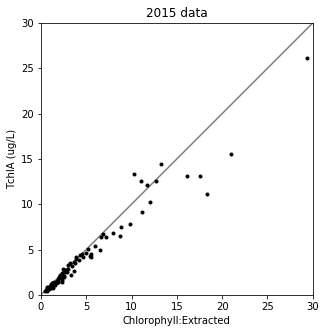

In [28]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(range(0,31),range(0,31),'-',color='gray')
ax.plot(dfout['Chlorophyll:Extracted'],dfout['TchlA (ug/L)'],'k.')
ax.set_xlabel('Chlorophyll:Extracted')
ax.set_ylabel('TchlA (ug/L)')
ax.set_aspect(1)
ax.set_xlim(0,30)
ax.set_ylim(0,30)
ax.set_title('2015 data')

Text(0.5, 1.0, '2015 data')

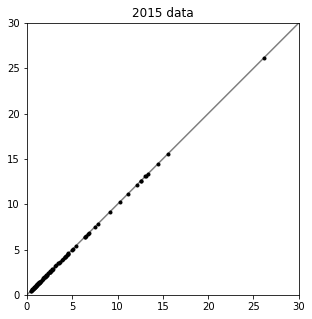

In [29]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(range(0,31),range(0,31),'-',color='gray')
ax.plot(dfout['TchlA (ug/L)'],dfout['Cyanobacteria']+dfout['Prasinophytes']+\
         dfout['Cryptophytes']+dfout['Diatoms-1']+dfout['Diatoms-2']+dfout['Dinoflagellates-1']+\
         dfout['Haptophytes']+dfout['Dictyo']+dfout['Raphido'],'k.')
ax.set_aspect(1)
ax.set_xlim(0,30)
ax.set_ylim(0,30)
ax.set_title('2015 data')

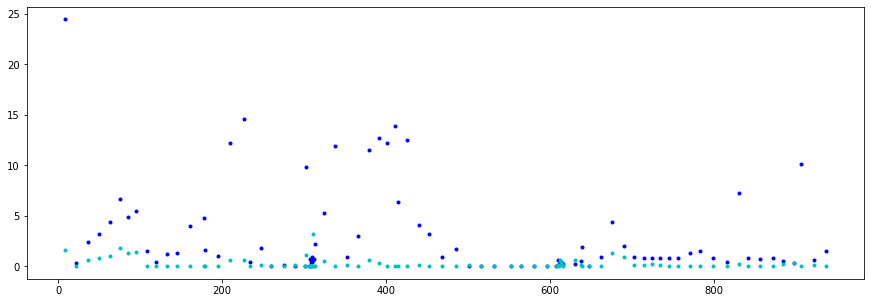

In [30]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.plot(dfout['Diatoms-1'],'b.')
ax.plot(dfout['Diatoms-2'],'c.')